## Changes from Model Draft 7
- Corrected error in setup of star network
- Set up real network based on commuting data of all California counties from 'LA_and_LA_adjacent_commuting_data.xlsx'
- Calculated eigenvector and pagerank centralities of both star network and real network
- Plotted histograms of centralities for both networks and identified the county with highest eigenvector, pagerank centrality
- Made two copies of the commuter network, one without LA County (has highest eigenvector centrality), and one without Santa Clara County (has highest pagerank) to simulate "barricading" the county with most traffic
- TODO: Run simulations on real commuter network, and on networks that have "barricades". Compare the spread of covid in these 3 different models.
- Note: I (Angela) did not touch any of the simulation code

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import math

# Theory Model (Star) using Commuter Data

In [2]:
data = pd.read_excel('Simplified_Commuting_Data.xlsx')
data_out_of_LA = data[["Workplace County.1","Commuters.1"]]
data_out_of_LA.head(10)

,Workplace County.1,Commuters.1
0,Alameda County,1003
1,Amador County,11
2,Butte County,61
3,Contra Costa County,360
4,El Dorado County,133
5,Fresno County,502
6,Humboldt County,178
7,Imperial County,212
8,Inyo County,101
9,Kern County,7522


In [3]:
data_into_LA = data[["Home County","Commuters"]]
data_into_LA.head(10)

,Home County,Commuters
0,Alameda County,732
1,Amador County,56
2,Butte County,41
3,Contra Costa County,681
4,El Dorado County,146
5,Fresno County,758
6,Humboldt County,69
7,Imperial County,167
8,Inyo County,14
9,Kern County,8922


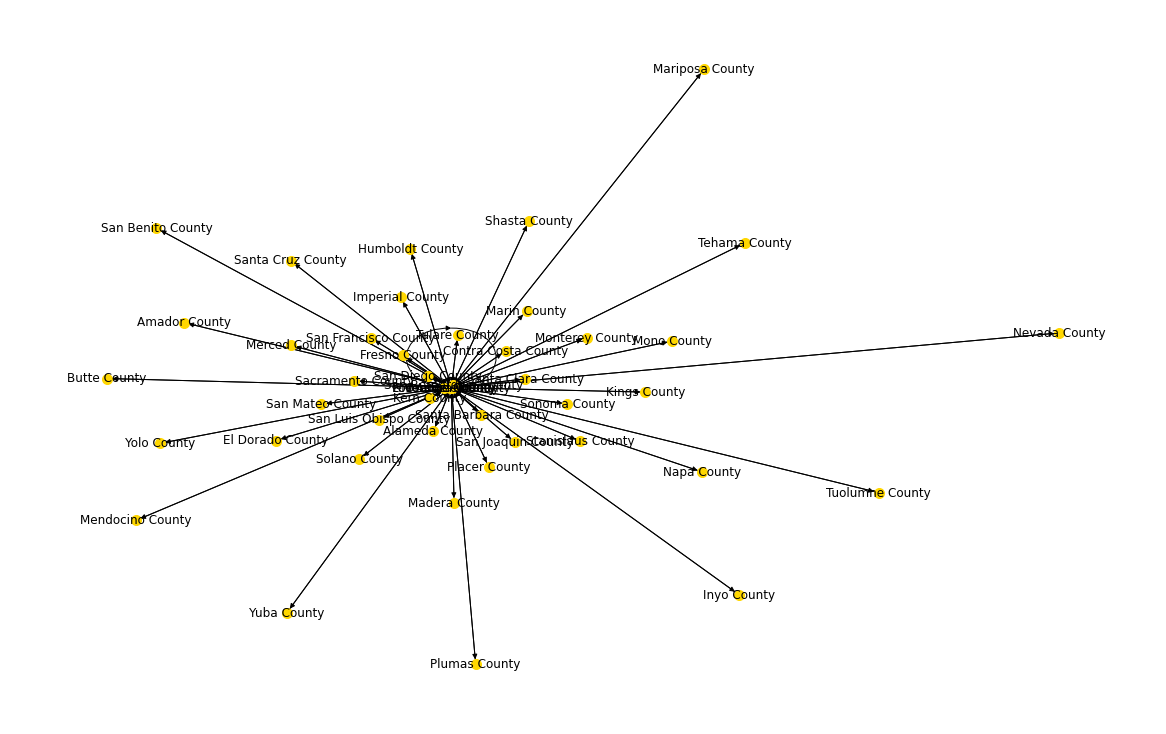

In [4]:
network_LA_star = nx.DiGraph()

# Weighted edges coming out of LA County 
for i in range(len(data_out_of_LA)): 
    network_LA_star.add_weighted_edges_from([("Los Angeles County",data_out_of_LA["Workplace County.1"][i], data_out_of_LA["Commuters.1"][i])])

# Weighted edges coming into LA County 
for i in range(len(data_into_LA)): 
    network_LA_star.add_weighted_edges_from([(data_into_LA["Home County"][i], "Los Angeles County", data_into_LA["Commuters"][i])])
    
plt.rcParams["figure.figsize"] = [16, 10]
pos=nx.spring_layout(network_LA_star,scale=10)
nx.draw(network_LA_star,node_size = 100, node_color = "gold", with_labels = True)

In [5]:
weights = pd.DataFrame(network_LA_star.degree(weight='weight'))
weights.head(10)
# This is the sum of the in and out degrees for each county

,0,1
0,Los Angeles County,9147168
1,Alameda County,1735
2,Amador County,67
3,Butte County,102
4,Contra Costa County,1041
5,El Dorado County,279
6,Fresno County,1260
7,Humboldt County,247
8,Imperial County,379
9,Inyo County,115


Eigenvector centrality of star network: 
Eigenvector centrality of LA County: 0.9988872083807622


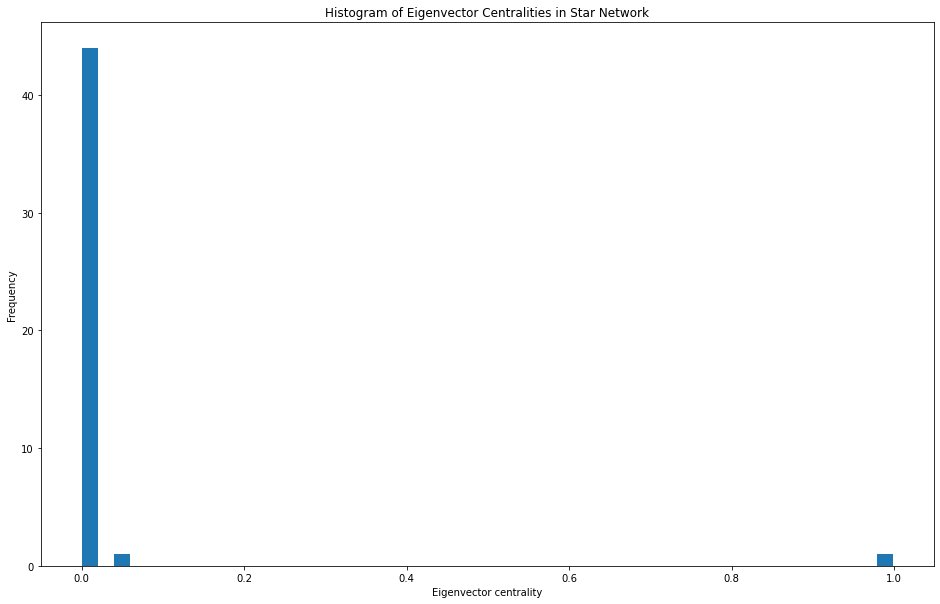

Pagerank centrality of star network: 
Pagerank centrality of LA County: 0.8051370736671487


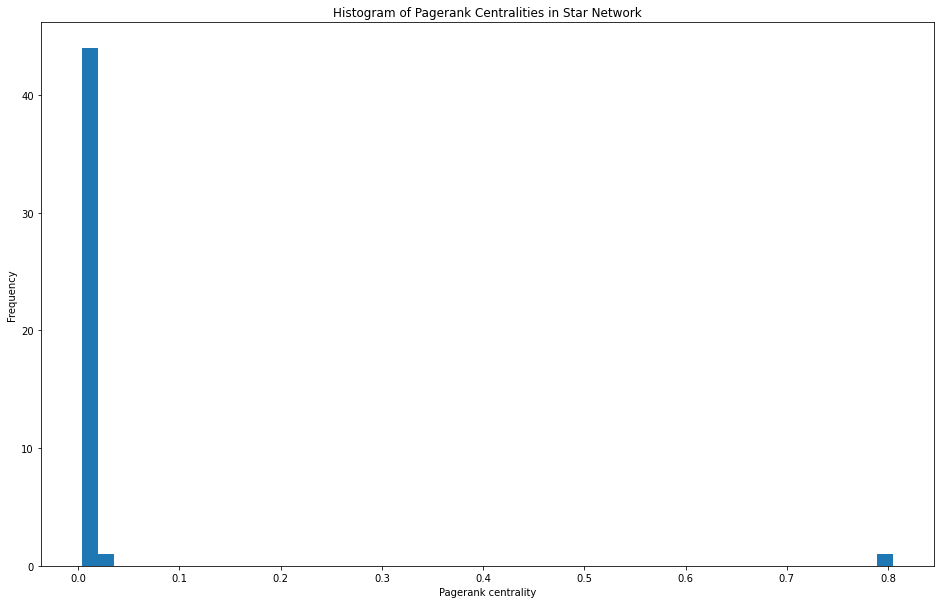

In [6]:
# Calculating centralities of star network
# Note: if you get "AttributeError: module 'scipy.sparse' has no attribute 'coo_array'", upgrade networkx and scipy!

### Calculate eigenvector centrality
eig_centralities_star = nx.eigenvector_centrality(network_LA_star, weight='weight')
# this returns a dictionary with keys=county name, value=centrality

# Display results
print("Eigenvector centrality of star network: ")
#print(eig_centralities_star) #Uncomment this line to see all the eigenvector centralities
print("Eigenvector centrality of LA County: " + str(eig_centralities_star["Los Angeles County"]))

plt.hist(eig_centralities_star.values(), 50)
plt.xlabel("Eigenvector centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Eigenvector Centralities in Star Network")
plt.show()


### Calculate Pagerank centralities
pagerank_centralities_star = nx.pagerank(network_LA_star, weight='weight')

# Display results
print("Pagerank centrality of star network: ")
#print(pagerank_centralities_star) #Uncomment this line to see all the pagerank centralities
print("Pagerank centrality of LA County: " + str(pagerank_centralities_star["Los Angeles County"]))

plt.hist(pagerank_centralities_star.values(), 50)
plt.xlabel("Pagerank centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Pagerank Centralities in Star Network")
plt.show()


# Real Model using Commuter Data from CA counties

In [7]:
# Load data
data_CA = pd.read_excel('updatedCommutingData.xlsx')
data_CA.head(10)

,Home County,Workplace County,Commuters
0,Alameda County,Alameda County,481925.0
1,Alameda County,Contra Costa County,42754.0
2,Alameda County,El Dorado County,11.0
3,Alameda County,Fresno County,101.0
4,Alameda County,Humboldt County,64.0
5,Alameda County,Kern County,68.0
6,Alameda County,Lake County,19.0
7,Alameda County,Los Angeles County,763.0
8,Alameda County,Marin County,5028.0
9,Alameda County,Mendocino County,57.0


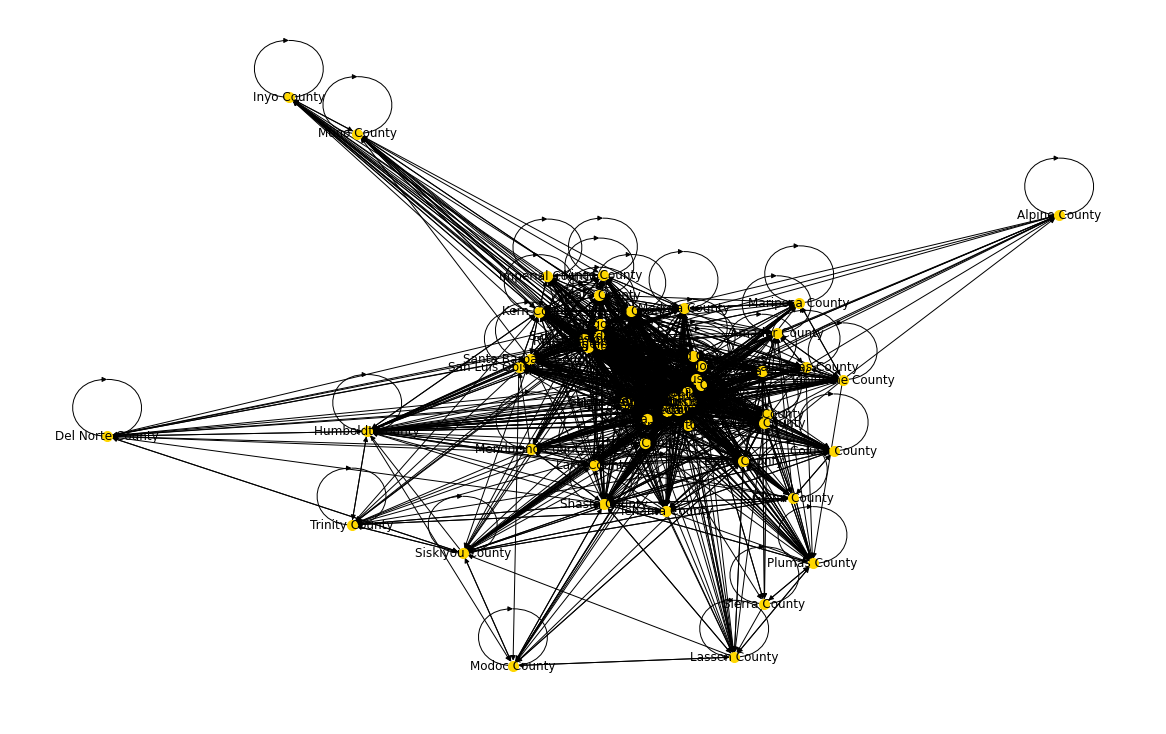

In [8]:
# Create network
network_CA = nx.DiGraph()

# Add all weighted edges
for i in range(len(data_CA)): 
    network_CA.add_weighted_edges_from([(data_CA["Home County"][i],data_CA["Workplace County"][i],data_CA["Commuters"][i])])

# Draw network
plt.rcParams["figure.figsize"] = [16, 10]
pos=nx.spring_layout(network_CA,scale=10)
nx.draw(network_CA,node_size = 100, node_color = "gold", with_labels = True)

Eigenvector centrality: 
{'Alameda County': 0.00029163334328798015, 'Contra Costa County': 9.898108072877576e-05, 'El Dorado County': 3.253241174409117e-05, 'Fresno County': 0.00013312909405440202, 'Humboldt County': 4.33910467479168e-05, 'Kern County': 0.0019524716807333981, 'Lake County': 2.7493019837103954e-05, 'Los Angeles County': 0.9977599687972114, 'Marin County': 3.954605715843731e-05, 'Mendocino County': 1.0859041046835566e-05, 'Merced County': 4.2556010385738395e-05, 'Monterey County': 0.0001262010993998445, 'Napa County': 1.4066942968877335e-05, 'Nevada County': 1.6365082295874413e-05, 'Orange County': 0.06411952565661373, 'Placer County': 4.16337820556807e-05, 'Riverside County': 0.00455414678018167, 'Sacramento County': 0.00018633712786665687, 'San Benito County': 8.97026927644296e-06, 'San Bernardino County': 0.015561100328349158, 'San Diego County': 0.0024406059708382243, 'San Francisco County': 0.0003915567217190359, 'San Joaquin County': 4.5775181946655965e-05, 'San Lu

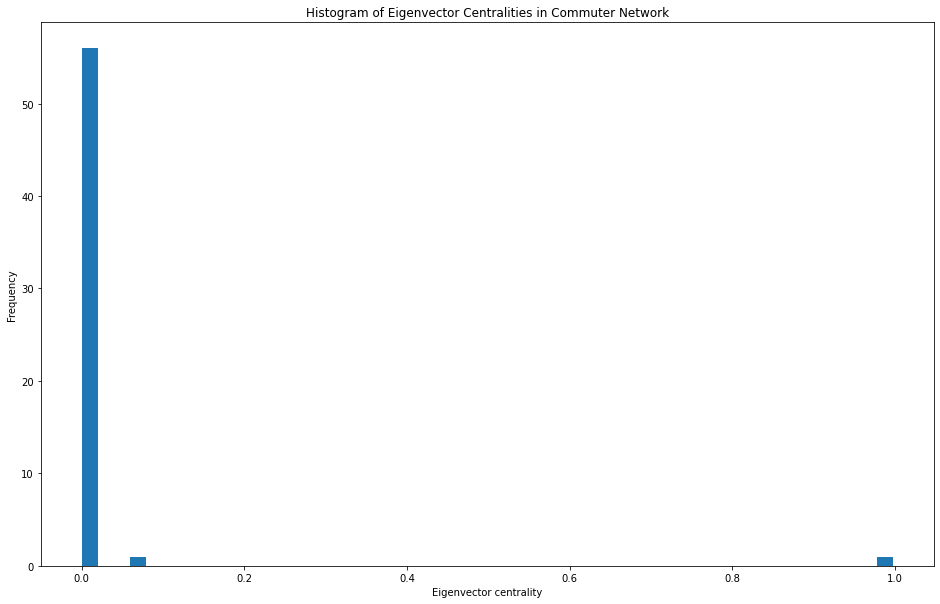

Pagerank centrality of real network: 
{'Alameda County': 0.03264036723605933, 'Contra Costa County': 0.014799563409346454, 'El Dorado County': 0.010704172387633085, 'Fresno County': 0.030565037383362616, 'Humboldt County': 0.021603789759986326, 'Kern County': 0.019609278490869332, 'Lake County': 0.008090804219284004, 'Los Angeles County': 0.04761324951481759, 'Marin County': 0.01236376091069594, 'Mendocino County': 0.015088780823087336, 'Merced County': 0.010194262633839114, 'Monterey County': 0.017069998844419433, 'Napa County': 0.01285730989721099, 'Nevada County': 0.012315743263451358, 'Orange County': 0.02079276669220669, 'Placer County': 0.019730402110263893, 'Riverside County': 0.010108131664103662, 'Sacramento County': 0.05851131890490186, 'San Benito County': 0.00503615045379986, 'San Bernardino County': 0.011045730579955358, 'San Diego County': 0.02161152401648525, 'San Francisco County': 0.05054462512952155, 'San Joaquin County': 0.017697957509930695, 'San Luis Obispo County'

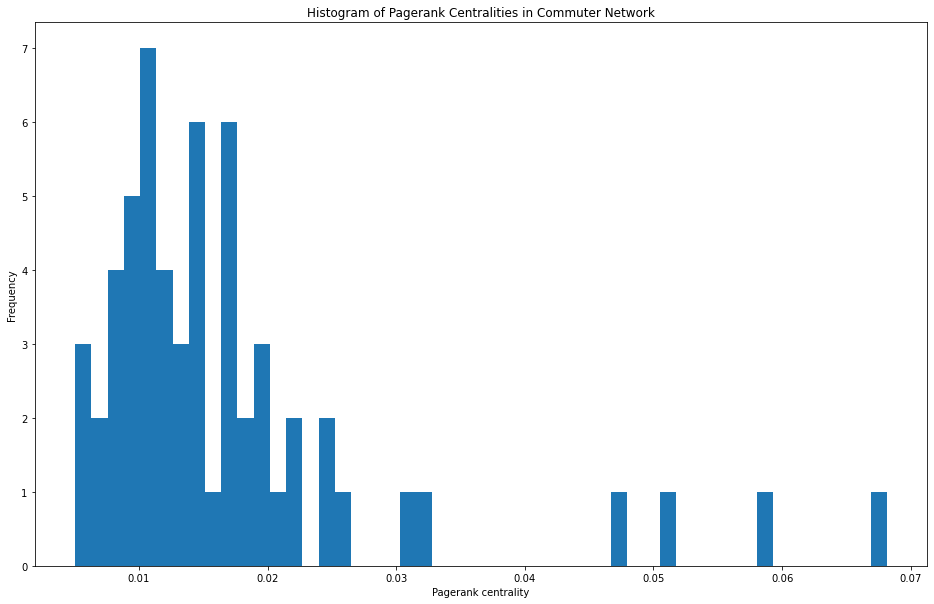

In [10]:
# Calculating centralities of real network
# Note: if you get "AttributeError: module 'scipy.sparse' has no attribute 'coo_array'", upgrade networkx and scipy!

# Calculate eigenvector centrality
eig_centralities = nx.eigenvector_centrality(network_CA, weight='weight')

# Display results
print("Eigenvector centrality: ")
print(eig_centralities) #Uncomment this line to see all the eigenvector centralities
print("Eigenvector centrality of LA County: " + str(eig_centralities["Los Angeles County"]))

plt.hist(eig_centralities.values(), 50)
plt.xlabel("Eigenvector centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Eigenvector Centralities in Commuter Network")
plt.show()

pagerank_centralities = nx.pagerank(network_CA, weight='weight')
print("Pagerank centrality of real network: ")
print(pagerank_centralities) #Uncomment this line to see all the pagerank centralities
print("Pagerank centrality of LA County: " + str(pagerank_centralities["Los Angeles County"]))

plt.hist(pagerank_centralities.values(), 50)
plt.xlabel("Pagerank centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Pagerank Centralities in Commuter Network")
plt.show()

## Removing node with largest centrality from Commuter Network

In [11]:
# Helper function that returns the node with the largest centrality measure
# Input: centralities is a dictionary with keys=counties, values=centrality of county
# Output: tuple in the format (county, centrality value)
def get_max_node(centralities):
    max_node = ""
    max_value = 0
    for i in centralities:
        if centralities[i] > max_value:
            max_value = centralities[i]
            max_node = i
    return (max_node, max_value)


The county with the highest eigenvector centrality is Los Angeles County ,with eigenvector centrality 0.9977599687972114


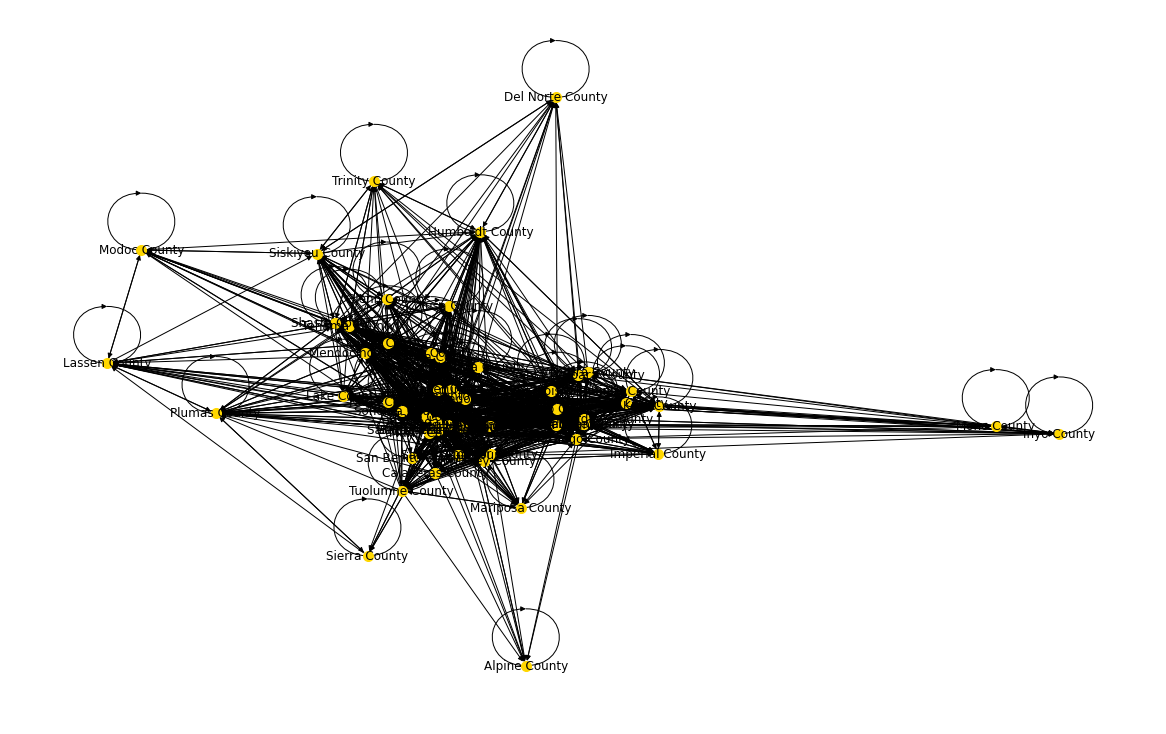

In [12]:
# Using eigenvector centrality, remove the "most important" county

# Find node with highest eigenvector centrality
max_node, max_value = get_max_node(eig_centralities)
print("The county with the highest eigenvector centrality is " + max_node 
      + " ,with eigenvector centrality " + str(max_value))

# Construct network without the max_node
network_eig = nx.DiGraph()
for i in range(len(data_CA)): 
    network_eig.add_weighted_edges_from([(data_CA["Home County"][i],data_CA["Workplace County"][i],data_CA["Commuters"][i])])
network_eig.remove_node(max_node)
plt.rcParams["figure.figsize"] = [16, 10]
pos=nx.spring_layout(network_eig,scale=10)
nx.draw(network_eig,node_size = 100, node_color = "gold", with_labels = True)



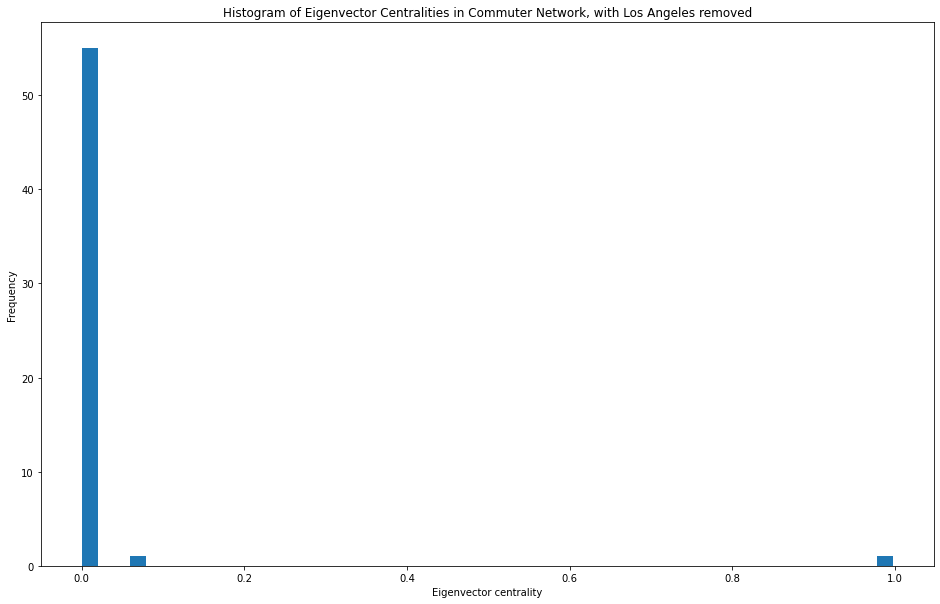

County with highest eigenvector centrality:('San Diego County', 0.9978754194086628)


In [40]:
# For commuter network with the county with highest eigenvector centrality (Los Angeles) removed:

# Calculate eigenvector centrality
eig_centralities_nomax = nx.eigenvector_centrality(network_eig, weight='weight')

# Display results
#print(eig_centralities_nomax)
plt.hist(eig_centralities_nomax.values(), 50)
plt.xlabel("Eigenvector centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Eigenvector Centralities in Commuter Network, with Los Angeles removed")
plt.show()

# The histogram has one value that is much higher than all the others, let's see which one it is
print("County with highest eigenvector centrality: " + str(get_max_node(eig_centralities_nomax)))

The county with the highest Pagerank centrality is Santa Clara County ,with Pagerank centrality 0.06814159981626151


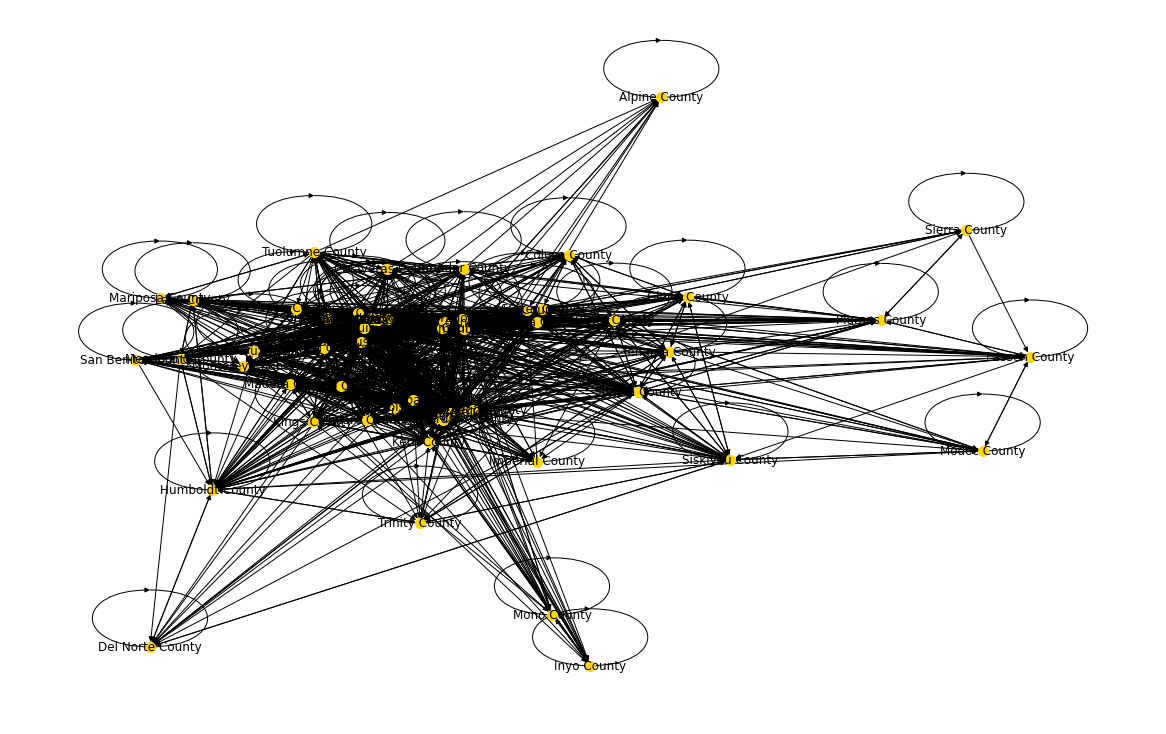

In [14]:
# Using Pagerank centrality, remove the "most important" county

# Find node with highest Pagerank centrality
max_node, max_value = get_max_node(pagerank_centralities)
print("The county with the highest Pagerank centrality is " + max_node 
      + " ,with Pagerank centrality " + str(max_value))

# Construct network without the max_node
network_pagerank = nx.DiGraph()
for i in range(len(data_CA)): 
    network_pagerank.add_weighted_edges_from([(data_CA["Home County"][i],data_CA["Workplace County"][i],data_CA["Commuters"][i])])
network_pagerank.remove_node(max_node)
plt.rcParams["figure.figsize"] = [16, 10]
pos=nx.spring_layout(network_eig,scale=10)
nx.draw(network_pagerank,node_size = 100, node_color = "gold", with_labels = True)

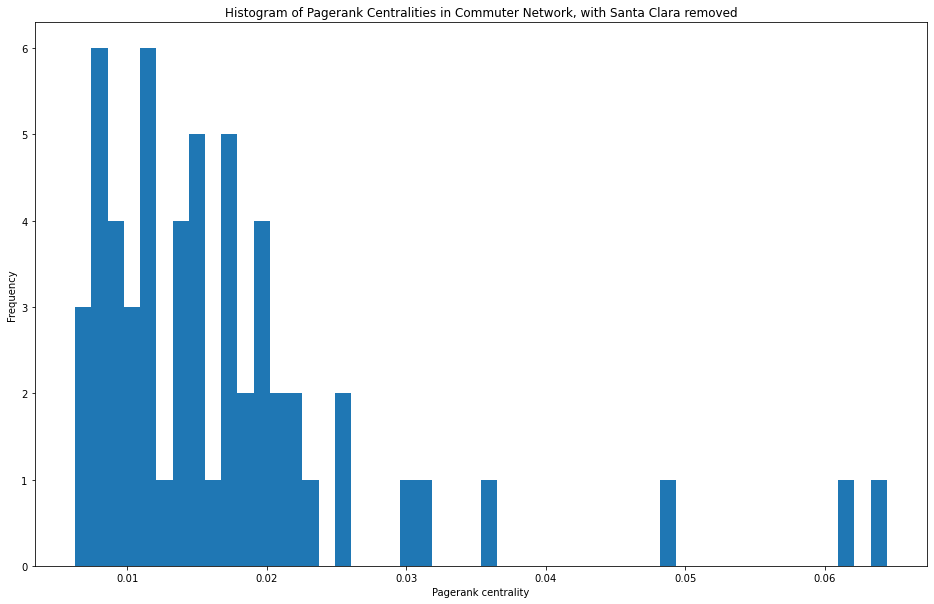

County with highest Pagerank centrality: ('San Francisco County', 0.06443805332305619)


In [15]:
# For commuter network with the county with highest Pagerank centrality (Santa Clara) removed:

# Calculate eigenvector centrality
pagerank_centralities_nomax = nx.pagerank(network_pagerank, weight='weight')

# Display results
#print(pagerank_centralities_nomax)
plt.hist(pagerank_centralities_nomax.values(), 50)
plt.xlabel("Pagerank centrality")
plt.ylabel("Frequency")
plt.title("Histogram of Pagerank Centralities in Commuter Network, with Santa Clara removed")
plt.show()

# The histogram has one value that is much higher than all the others, let's see which one it is
print("County with highest Pagerank centrality: " + str(get_max_node(pagerank_centralities_nomax)))

# Simulation Model

In [22]:
# Array of population counts in each county
array = np.arange(46)
for i in range(len(array)):
    array[i]=100
array

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100])

<div class="alert alert-block alert-success">
Reset

In [312]:
# Total population = 1000 
array = np.arange(46)
for i in range(len(array)):
    array[i]=1000    
    
    
zeros = np.zeros(46, dtype = int) 

data = { 'County name': names, 
       "Total population": array,
        "Commuters to LA county": data_into_LA["Commuters"],
       "Non-infected": array, 
       "Infected": zeros,
       "Already Infected": zeros}

simulation_at_moment = pd.DataFrame(data)

simulation_at_moment.head()

,County name,Total population,Commuters to LA county,Non-infected,Infected,Already Infected
0,Alameda County,1000,732,1000,0,0
1,Amador County,1000,56,1000,0,0
2,Butte County,1000,41,1000,0,0
3,Contra Costa County,1000,681,1000,0,0
4,El Dorado County,1000,146,1000,0,0


<div class="alert alert-block alert-success">
Infection rate: Justified via an article and can be adjusted based on which variant we look at

In [300]:
Infection_rate = 0.07

In [154]:
#Commuters to LA county
simulation_at_moment.iat[0,2]

#Non-infected
simulation_at_moment.iat[0,3]

#Infected
simulation_at_moment.iat[0,4]


0

In [313]:
# Use example with only Alameda County 

zeros2 = np.zeros(25, dtype = int) 

commute_Alameda = [732, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


data2 = {"Country Name": "NA",
         "Iteration": zeros2,
         "Commuters to LA county": commute_Alameda, 
       "Non-infected": zeros2, 
       "Infected": zeros2}

tracking_Alameda = pd.DataFrame(data2)
tracking_Alameda.head(3)

,Country Name,Iteration,Commuters to LA county,Non-infected,Infected
0,NA,0,732,0,0
1,NA,0,0,0,0
2,NA,0,0,0,0


In [314]:
for i in range(25):    
    tracking_Alameda.iat[i,0] = i
    
    newly_infected = round(simulation_at_moment.iat[0,2] * Infection_rate)
    
    #INFEECTED
    simulation_at_moment.iat[0,4] = simulation_at_moment.iat[0,4] + newly_infected 
    tracking_Alameda.iat[i,4] = simulation_at_moment.iat[0,4]
    
    
    #NONINFECTED
    simulation_at_moment.iat[0,3] = simulation_at_moment.iat[0,3] - newly_infected
    tracking_Alameda.iat[i,3] = simulation_at_moment.iat[0,3]
    
    #COMMUTERS
    simulation_at_moment.iat[0,2] = simulation_at_moment.iat[0,2] - newly_infected
    tracking_Alameda.iat[i,2] = simulation_at_moment.iat[0,2]
    

In [315]:
tracking_Alameda 


,Country Name,Iteration,Commuters to LA county,Non-infected,Infected
0,0,0,681,949,51
1,1,0,633,901,99
2,2,0,589,857,143
3,3,0,548,816,184
4,4,0,510,778,222
5,5,0,474,742,258
6,6,0,441,709,291
7,7,0,410,678,322
8,8,0,381,649,351
9,9,0,354,622,378


<AxesSubplot:>

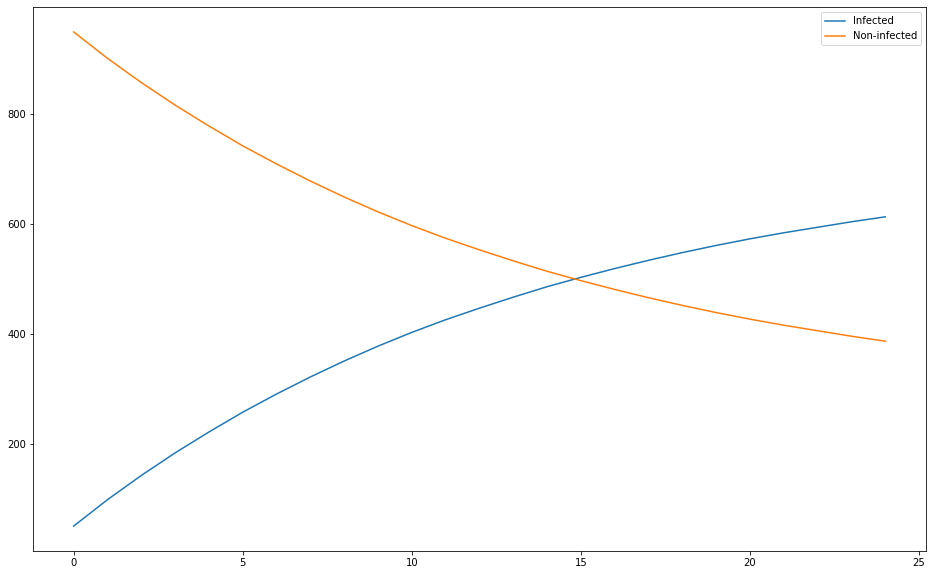

In [316]:
time = np.arange(24)
tracking_Alameda[["Infected",'Non-infected']].plot(secondary_y = 'Iteration')